In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\anaconda3\envs\my_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\anaconda3\envs\my_env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\anaconda3\envs\my_env\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [20]:
df = pd.read_csv('survey_results_public.csv')

In [21]:
df = df[['Country','EdLevel','YearsCodePro','Employment','ConvertedComp']]

In [22]:
df = df.rename({'ConvertedComp':'Salary'},axis=1)

In [26]:
df = df[df['Salary'].notnull()]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [29]:
df = df.dropna()

In [41]:
df = df[df['Employment'] == 'Employed full-time']
df = df.drop('Employment',axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [49]:
(df['Country'].value_counts())

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Belize               1
Namibia              1
Swaziland            1
San Marino           1
Guinea               1
Name: Country, Length: 154, dtype: int64

In [52]:
def clean_data(col,threshold):
    countries = {}
    for i in range(len(col)):
        if col.values[i] >= threshold:
            countries[col.index[i]] = col.index[i]
        else:
            countries[col.index[i]] = 'Other'
    return countries

In [53]:
country_map = clean_data(df['Country'].value_counts(),400)

In [54]:
country_map

{'United States': 'United States',
 'India': 'India',
 'United Kingdom': 'United Kingdom',
 'Germany': 'Germany',
 'Canada': 'Canada',
 'Brazil': 'Brazil',
 'France': 'France',
 'Spain': 'Spain',
 'Australia': 'Australia',
 'Netherlands': 'Netherlands',
 'Poland': 'Poland',
 'Italy': 'Italy',
 'Russian Federation': 'Russian Federation',
 'Sweden': 'Sweden',
 'Turkey': 'Other',
 'Israel': 'Other',
 'Pakistan': 'Other',
 'Switzerland': 'Other',
 'Mexico': 'Other',
 'Ireland': 'Other',
 'Norway': 'Other',
 'Ukraine': 'Other',
 'Romania': 'Other',
 'South Africa': 'Other',
 'Czech Republic': 'Other',
 'Austria': 'Other',
 'Belgium': 'Other',
 'Iran': 'Other',
 'Portugal': 'Other',
 'Denmark': 'Other',
 'Finland': 'Other',
 'Argentina': 'Other',
 'Hungary': 'Other',
 'New Zealand': 'Other',
 'Greece': 'Other',
 'Japan': 'Other',
 'Bangladesh': 'Other',
 'Bulgaria': 'Other',
 'Colombia': 'Other',
 'Serbia': 'Other',
 'Philippines': 'Other',
 'Indonesia': 'Other',
 'Nigeria': 'Other',
 'Singa

In [55]:
df['Country'] = df['Country'].map(country_map)

In [57]:
df['Country'].value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

In [63]:
import seaborn as sns

<AxesSubplot:xlabel='Country', ylabel='Salary'>

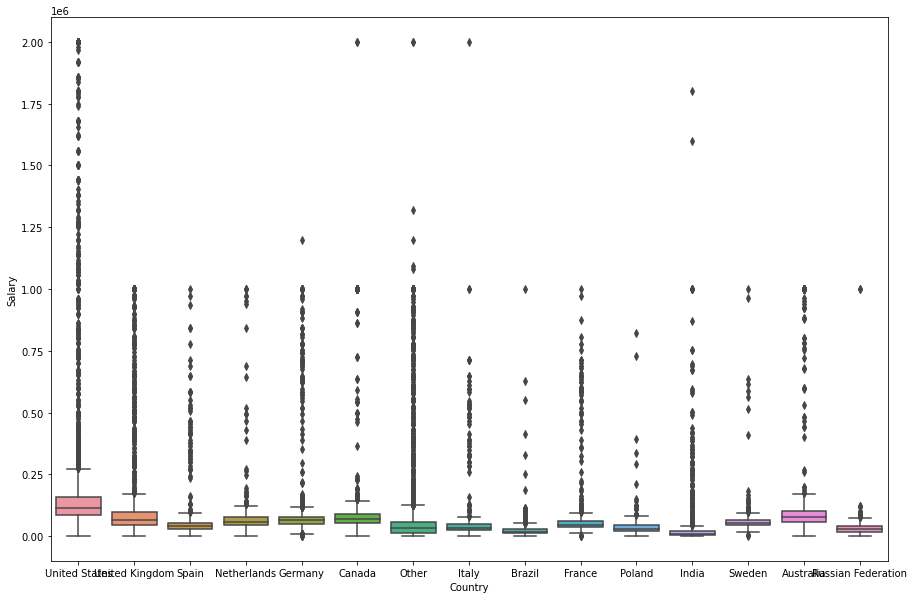

In [67]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x = df['Country'], y = df['Salary'])

In [69]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Other']

<AxesSubplot:xlabel='Country', ylabel='Salary'>

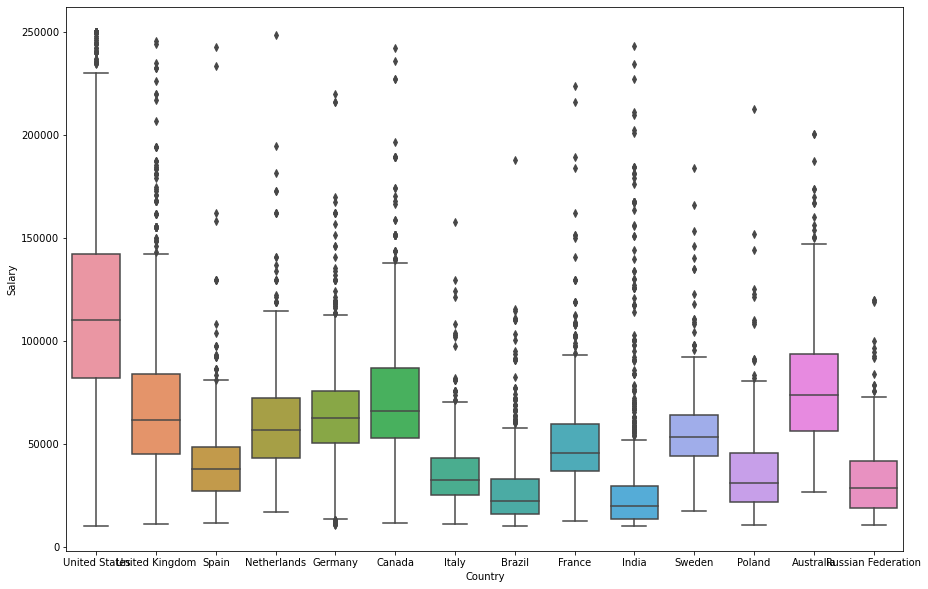

In [70]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x = df['Country'], y = df['Salary'])

In [71]:
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [74]:
def clean_experience(col):
    if col == 'More than 50 years':
        return 50
    if col == 'Less than 1 year':
        return 0.5
    return float(col)

In [75]:
df['Experience'] = df['YearsCodePro'].apply(clean_experience)

In [78]:
df = df.drop('YearsCodePro',axis=1)

In [81]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [83]:
def clean_education_level(col):
    if "Bachelor’s degree" in col:
        return 'Bachelor’s degree'
    if "Master’s degree" in col:
        return "Master’s degree"
    if 'Professional degree' in col or 'Other doctoral' in col:
        return 'Post Grad'
    return 'Less than a bachelors'

In [84]:
df['Education_Level'] = df['EdLevel'].apply(clean_education_level)

In [86]:
df = df.drop('EdLevel',axis=1)

In [87]:
df['Education_Level'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a bachelors',
       'Post Grad'], dtype=object)

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
edu_level = LabelEncoder()

In [91]:
df['Education_Level']  = edu_level.fit_transform(df['Education_Level'])

In [93]:
df['Education_Level'].unique()

array([0, 2, 1, 3])

In [94]:
countries_le = LabelEncoder()

df['Country'] = countries_le.fit_transform(df['Country'])

In [95]:
df['Country'].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

#MAKING MODEL

In [96]:
X = df.drop("Salary",axis=1)
y = df['Salary']

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [107]:
y_pred = reg_model.predict(X_test)

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [109]:
error1 = mean_absolute_error(y_test,y_pred)
error2 = np.sqrt(mean_squared_error(y_test,y_pred))

In [110]:
print(error1,error2)

30054.06797109598 38530.67398101534


In [111]:
from sklearn.tree import DecisionTreeRegressor

In [112]:
tree_model = DecisionTreeRegressor(random_state = 0)
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [113]:
y_pred = tree_model.predict(X_test)

In [114]:
error1 = mean_absolute_error(y_test,y_pred)
error2 = np.sqrt(mean_squared_error(y_test,y_pred))

In [115]:
print(error1,error2)

22064.512358943688 32140.777586789416


In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
forest_model = RandomForestRegressor(random_state = 0)
forest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [118]:
y_pred = forest_model.predict(X_test)

In [119]:
error1 = mean_absolute_error(y_test,y_pred)
error2 = np.sqrt(mean_squared_error(y_test,y_pred))

In [121]:
print(error1,error2)

21848.889987177543 31764.697100561007


In [122]:
from sklearn.model_selection import GridSearchCV

In [132]:
max_depth = [None,2,4,6,8,10,12]
param_grid = {'max_depth':max_depth}

In [133]:
regressor = RandomForestRegressor(random_state = 0)

In [134]:
gs = GridSearchCV(regressor,param_grid,scoring = 'neg_mean_squared_error')

In [135]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [136]:
regressor = gs.best_estimator_

In [137]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$30,946.95


In [138]:
X

,Country,Experience,Education_Level
7,13,13.0,0
9,12,4.0,2
10,12,2.0,0
11,10,7.0,1
12,7,20.0,1
...,...,...,...
64113,13,15.0,1
64116,13,6.0,0
64122,13,4.0,1
64127,13,12.0,3


In [139]:
ip = np.array([['United States','Master’s degree',15]])

In [140]:
ip

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [142]:
ip[:,0] = countries_le.transform(ip[:,0])
ip[:,1] = edu_level.transform(ip[:,1])
ip = ip.astype(float)


In [144]:
prediction = regressor.predict(ip)

In [145]:
prediction

array([108640.51967989])

In [146]:
import pickle

In [148]:
data = {'model':regressor,'le_country':countries_le,'le_education':edu_level}
with open('saved_step.pkl','wb') as file:
    pickle.dump(data,file)

In [149]:
with open('saved_step.pkl','rb') as file:
    data = pickle.load(file)

In [150]:
loaded_regressor = data['model']
le_country = data['le_country']
le_edu  = data['le_education']

In [151]:
pred = loaded_regressor.predict(ip)

In [152]:
pred

array([108640.51967989])

In [154]:
df['Country'].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])